In [1]:
# change dir to root
import os
import sys
print(os.getcwd())
if os.getcwd().split('/')[-1] == 'betbot_tennis':
    os.chdir(os.path.join(os.getcwd(), 'tennis'))
elif os.getcwd().split('/')[-1] == 'tennis':
    pass
else:
    raise ValueError('Not in root dir')
print(os.getcwd())
from utils.classes import TennisMatchDataset
import numpy as np
import pandas as pd
import json
import os 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset, TensorDataset
import torch.optim as optim
from tqdm.notebook import tqdm
import torch 
from torch.utils.data import random_split
import utils.constants as c
import data.utils.constants as c2
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

MAX_PADDED = 20


/users/eleves-b/2021/mathias.grau/betbot_tennis/tennis
/users/eleves-b/2021/mathias.grau/betbot_tennis/tennis


In [2]:
tournaments = [   
                                        'past-french-open-atp-singles', 
                                        'past-australian-open-atp-singles',
                                        'past-rome-atp-singles', 
                                        'past-madrid-atp-singles',
                                        'past-monte-carlo-atp-singles',
                                        'past-lyon-atp-singles',
                                        'past-barcelona-atp-singles',
                                        'past-munich-atp-singles',
                                        'past-geneva-atp-singles',
                                        'past-estoril-atp-singles',
                                        'past-houston-atp-singles',
                                        'past-marrakech-atp-singles',
                                        'past-bucharest-atp-singles',
                                        'past-doha-atp-singles',
                                        'past-dubai-atp-singles',
                                        'past-indian-wells-atp-singles',
                                        'past-miami-atp-singles',
                                        'past-acapulco-atp-singles',
                                        'past-rio-de-janeiro-atp-singles',
                                        'past-santiago-atp-singles',
                                        'past-brisbane-atp-singles',
                                        'past-hong-kong-atp-singles',
                                        'past-auckland-atp-singles',
                                        'past-adelaide-atp-singles',
                                        'past-montpellier-atp-singles',
                                        'past-marseille-atp-singles',
                                        'past-cordoba-atp-singles',
                                        'past-dallas-atp-singles',
                                        'past-french-open-2023-atp-singles',
                                        'past-australian-open-2023-atp-singles',
                                        'past-rome-2023-atp-singles',
                                        'past-madrid-2023-atp-singles',
                                        'past-monte-carlo-2023-atp-singles',
                                        'past-lyon-2023-atp-singles',
                                        'past-barcelona-2023-atp-singles',
                                        'past-munich-2023-atp-singles',
                                        'past-geneva-2023-atp-singles',
                                        'past-estoril-2023-atp-singles',
                                        'past-houston-2023-atp-singles',
                                        'past-marrakech-2023-atp-singles', 
                                        'past-doha-2023-atp-singles',
                                        'past-dubai-2023-atp-singles',
                                        'past-indian-wells-2023-atp-singles',
                                        'past-miami-2023-atp-singles',
                                        'past-acapulco-2023-atp-singles',
                                        'past-rio-de-janeiro-2023-atp-singles',
                                        'past-santiago-2023-atp-singles',
                                        'past-auckland-2023-atp-singles',
                                        'past-adelaide-2023-atp-singles',
                                        'past-montpellier-2023-atp-singles',
                                        'past-marseille-2023-atp-singles',
                                        'past-cordoba-2023-atp-singles',
                                        'past-dallas-2023-atp-singles',
                                        'past-stuttgart-2023-atp-singles',
                                        'past-hertogenbosch-2023-atp-singles',
                                        'past-halle-2023-atp-singles',
                                        'past-london-2023-atp-singles',
                                        'past-mallorca-2023-atp-singles',
                                        'past-eastbourne-2023-atp-singles',
                                        'past-wimbledon-2023-atp-singles',
                                        'past-hamburg-2023-atp-singles',
                                          'past-bastad-2023-atp-singles',
                                          'past-gstaad-2023-atp-singles', ###
                                          'past-newport-2023-atp-singles',
                                          'past-umag-2023-atp-singles',
                                          'past-atlanta-2023-atp-singles',
                                          'past-washington-2023-atp-singles',
                                          'past-cincinnati-2023-atp-singles',
                                          'past-winston-salem-2023-atp-singles',
                                          'past-us-open-2023-atp-singles', ###
                                          'past-chengdu-2023-atp-singles',
                                          'past-zhuhai-2023-atp-singles', ###
                                          'past-tokyo-2023-atp-singles',
                                          'past-beijing-2023-atp-singles', ###
                                          'past-shanghai-2023-atp-singles',
                                          'past-stockholm-2023-atp-singles',
                                          'past-antwerp-2023-atp-singles', ###
                                          'past-vienna-2023-atp-singles',
                                          'past-basel-2023-atp-singles',
                                          'past-paris-2023-atp-singles',
                                          'past-metz-2023-atp-singles',
                                          'past-finals-turin-2023-atp-singles',
                                          'past-stuttgart-atp-singles',
                                          'past-hertogenbosch-atp-singles',
                                          'past-halle-atp-singles',
                                          'past-london-atp-singles',
                                     ]

tennis_dataset = TennisMatchDataset(tournaments)

Loading data for tournaments {'past-basel-2023-atp-singles', 'past-mallorca-2023-atp-singles', 'past-geneva-2023-atp-singles', 'past-bastad-2023-atp-singles', 'past-monte-carlo-atp-singles', 'past-chengdu-2023-atp-singles', 'past-wimbledon-2023-atp-singles', 'past-gstaad-2023-atp-singles', 'past-halle-atp-singles', 'past-cordoba-atp-singles', 'past-stockholm-2023-atp-singles', 'past-bucharest-atp-singles', 'past-tokyo-2023-atp-singles', 'past-rome-atp-singles', 'past-rome-2023-atp-singles', 'past-atlanta-2023-atp-singles', 'past-santiago-2023-atp-singles', 'past-cordoba-2023-atp-singles', 'past-london-2023-atp-singles', 'past-munich-2023-atp-singles', 'past-houston-atp-singles', 'past-indian-wells-atp-singles', 'past-auckland-atp-singles', 'past-rio-de-janeiro-2023-atp-singles', 'past-halle-2023-atp-singles', 'past-us-open-2023-atp-singles', 'past-french-open-atp-singles', 'past-hertogenbosch-atp-singles', 'past-indian-wells-2023-atp-singles', 'past-zhuhai-2023-atp-singles', 'past-adel

In [3]:
# nb_errors = 0
# list_vectors = []
# list_labels = []
# for match_id in tqdm(tennis_dataset.get_matches_ids()):
#     nb_try = 0
#     while nb_try < 3:
#         try :
#             vector = tennis_dataset.get_match(match_id).get_feature_vector()
#             list_vectors.append(vector)
#             label = tennis_dataset.get_match(match_id).get_label()
#             list_labels.append(label)
#             break
#         except Exception as e:
#             nb_try += 1
#             if nb_try == 3 :
#                 tqdm.write(f"error : {e} for match_id : {match_id} opposing {tennis_dataset.get_match(match_id).get_players()[0]} to {tennis_dataset.get_match(match_id).get_players()[1]}")
#                 nb_errors += 1
    
    
# tqdm.write(f'Number of errors : {nb_errors} over {len(tennis_dataset.get_matches_ids())} matches')
list_vectors, list_labels, lst_match_id, nb_errors = tennis_dataset.get_past_vectors()

tqdm.write(f'Number of errors : {nb_errors}')


  0%|          | 0/86 [00:00<?, ?it/s]

Error 'bu70' for match dQ6Djtgt in tournament past-basel-2023-atp-singles
Error 'g0a0' for match 4ItqtMFo in tournament past-basel-2023-atp-singles
Error 'bu70' for match EkVXY48I in tournament past-basel-2023-atp-singles
Error 'b0lw' for match INyPzRw6 in tournament past-basel-2023-atp-singles
Error 'l397' for match d24T6JUH in tournament past-mallorca-2023-atp-singles
Error 'l397' for match YiNcHJVK in tournament past-mallorca-2023-atp-singles
Error 'l397' for match nP6SGOQM in tournament past-mallorca-2023-atp-singles
Error 'pc11' for match 8bD0KJRH in tournament past-mallorca-2023-atp-singles
Error 'i305' for match pAPVFrtT in tournament past-mallorca-2023-atp-singles
Error 'pc11' for match ji2bB2lp in tournament past-mallorca-2023-atp-singles
Error 'm0oq' for match 0ryoGWIE in tournament past-mallorca-2023-atp-singles
Error 'mn20' for match ddujPIg7 in tournament past-mallorca-2023-atp-singles
Error 'm0oq' for match EXkoQbv1 in tournament past-mallorca-2023-atp-singles
Error 'd916

  8%|▊         | 7/86 [00:00<00:01, 40.17it/s]

Error 'bi47' for match tbtVur1O in tournament past-wimbledon-2023-atp-singles
Error 'bv24' for match WQTXxFpp in tournament past-wimbledon-2023-atp-singles
Error 'gb53' for match YDEuVQn6 in tournament past-wimbledon-2023-atp-singles
Error 'g0kv' for match INTexHjd in tournament past-wimbledon-2023-atp-singles
Error 'g983' for match 8nm0erI8 in tournament past-wimbledon-2023-atp-singles
Error 'gb93' for match jko6onXn in tournament past-wimbledon-2023-atp-singles
Error 'o449' for match Q7wJrpH5 in tournament past-wimbledon-2023-atp-singles
Error 'k0dp' for match vHbS4UY0 in tournament past-wimbledon-2023-atp-singles
Error 'kh56' for match 6N21zstq in tournament past-wimbledon-2023-atp-singles
Error 's0tm' for match lde8gMnL in tournament past-wimbledon-2023-atp-singles
Error 'ch90' for match viXuygFd in tournament past-wimbledon-2023-atp-singles
Error 'm0tb' for match 2kdAYKAe in tournament past-wimbledon-2023-atp-singles
Error 'u120' for match CKgMQBeK in tournament past-wimbledon-202

 16%|█▋        | 14/86 [00:00<00:01, 51.26it/s]

Error 'cf01' for match MidZLnNo in tournament past-cordoba-atp-singles
Error 'g0dl' for match YBZOKIa6 in tournament past-cordoba-atp-singles
Error 'ge28' for match 63jBMoqg in tournament past-cordoba-atp-singles
Error 'm0tb' for match U5sWHNcO in tournament past-cordoba-atp-singles
Error 'o376' for match zqrSI3rI in tournament past-cordoba-atp-singles
Error 'g983' for match Ayc2O7Et in tournament past-cordoba-atp-singles
Error 'g0dl' for match h0n7NRTn in tournament past-cordoba-atp-singles
Error 'cg07' for match dhqOJqTB in tournament past-cordoba-atp-singles
Error 'kc29' for match 0QkFL5ba in tournament past-cordoba-atp-singles
Error 'b0jg' for match YNgdj38U in tournament past-stockholm-2023-atp-singles
Error 'f09j' for match 6BOA9Q8h in tournament past-stockholm-2023-atp-singles
Error 'mm78' for match 6urV4K7H in tournament past-stockholm-2023-atp-singles
Error 'ss25' for match IHAbmhxp in tournament past-stockholm-2023-atp-singles
Error 'e0ci' for match GjkI7MNb in tournament pas

 16%|█▋        | 14/86 [00:00<00:01, 51.26it/s]

Error 'cf01' for match QqkhW0ii in tournament past-rome-2023-atp-singles
Error 'cf01' for match xIBLTOFf in tournament past-rome-2023-atp-singles
Error 'pc11' for match CzQ3t2a0 in tournament past-rome-2023-atp-singles
Error 'mv14' for match p40L8DUg in tournament past-rome-2023-atp-singles
Error 'wb32' for match xCtn9QDa in tournament past-rome-2023-atp-singles
Error 'mv14' for match 6abEr7Qo in tournament past-rome-2023-atp-singles
Error 'ca12' for match 8ngpoloB in tournament past-rome-2023-atp-singles
Error 'pc11' for match 4fdTlWon in tournament past-rome-2023-atp-singles
Error 'cf01' for match t0ihqSFN in tournament past-rome-2023-atp-singles
Error 'g0a0' for match tGuGb7FA in tournament past-rome-2023-atp-singles
Error 'j0dg' for match W6eQu5A4 in tournament past-rome-2023-atp-singles
Error 'e831' for match SYS3O3uU in tournament past-rome-2023-atp-singles
Error 'wb32' for match 04IWVHu7 in tournament past-rome-2023-atp-singles
Error 'kb05' for match IuTRWcQ0 in tournament past-

 23%|██▎       | 20/86 [00:00<00:01, 41.21it/s]

Error 'cf01' for match tvny13Kc in tournament past-santiago-2023-atp-singles
Error 'sh90' for match SGalduZS in tournament past-santiago-2023-atp-singles
Error 'te16' for match bwsQh4gp in tournament past-santiago-2023-atp-singles
Error 'bi47' for match GtrFUjUl in tournament past-santiago-2023-atp-singles
Error 'j0dg' for match xdWNSUb1 in tournament past-santiago-2023-atp-singles
Error 'te16' for match YcjdEJgL in tournament past-santiago-2023-atp-singles
Error 'j0dg' for match z9esrzdS in tournament past-santiago-2023-atp-singles
Error 'o376' for match bR2Sa84n in tournament past-santiago-2023-atp-singles
Error 'te16' for match vmTZTZkF in tournament past-santiago-2023-atp-singles
Error 'd874' for match bkqySDKR in tournament past-santiago-2023-atp-singles
Error 'j0dg' for match WMPRVeL2 in tournament past-santiago-2023-atp-singles
Error 'o376' for match UHoq7Cr2 in tournament past-santiago-2023-atp-singles
Error 'lb07' for match IwSwTg5L in tournament past-santiago-2023-atp-singles

 23%|██▎       | 20/86 [00:00<00:01, 41.21it/s]

Error 'wb32' for match MccGWszc in tournament past-us-open-2023-atp-singles
Error 'i186' for match OOrhgKWR in tournament past-us-open-2023-atp-singles
Error 'j0dg' for match MX9dUItK in tournament past-us-open-2023-atp-singles
Error 'pc11' for match t8BAElaE in tournament past-us-open-2023-atp-singles
Error 'g0a0' for match fmcHpDuA in tournament past-us-open-2023-atp-singles
Error 'wb32' for match dfrCmFei in tournament past-us-open-2023-atp-singles
Error 'i186' for match GdbDogQ3 in tournament past-us-open-2023-atp-singles
Error 'mv14' for match fFio8nxr in tournament past-us-open-2023-atp-singles
Error 'bd80' for match 2J3ZZeRi in tournament past-us-open-2023-atp-singles
Error 'cf01' for match 2FkHUF72 in tournament past-us-open-2023-atp-singles
Error 'kf17' for match bJvbGPnh in tournament past-us-open-2023-atp-singles
Error 't0ha' for match YyXADNWA in tournament past-us-open-2023-atp-singles
Error 'i305' for match Eg9M8Ypq in tournament past-us-open-2023-atp-singles
Error 'kh56'

Error 'kh56' for match 0xtaesN5 in tournament past-us-open-2023-atp-singles
Error 'so20' for match vklzWQgf in tournament past-us-open-2023-atp-singles
Error 'n663' for match OGKL0cGr in tournament past-us-open-2023-atp-singles
Error 'ge28' for match vPtw9L82 in tournament past-us-open-2023-atp-singles
Error 'j476' for match nZFPtr8C in tournament past-us-open-2023-atp-singles
Error 'pd07' for match Glvmbqwm in tournament past-us-open-2023-atp-singles
Error 'k0db' for match IuPXt3P9 in tournament past-us-open-2023-atp-singles
Error 'lc12' for match dUITbyoe in tournament past-us-open-2023-atp-singles
Error 'm0nb' for match hdCxcFF7 in tournament past-us-open-2023-atp-singles
Error 'a678' for match tfI5Gof7 in tournament past-us-open-2023-atp-singles
Error 'ga36' for match v3T8pQ8m in tournament past-us-open-2023-atp-singles
Error 'z0bz' for match MiU7gLiI in tournament past-us-open-2023-atp-singles
Error 'ss25' for match QFefYyxE in tournament past-us-open-2023-atp-singles
Error 'i306'

Error 'g0a0' for match xUD2pVnN in tournament past-adelaide-2023-atp-singles
Error 'mh30' for match dCyrgtJs in tournament past-adelaide-2023-atp-singles
Error 'y268' for match lAzrmHkM in tournament past-adelaide-2023-atp-singles
Error 'kf17' for match fmyvlczG in tournament past-adelaide-2023-atp-singles
Error 'g0a0' for match 69mBFVsJ in tournament past-adelaide-2023-atp-singles
Error 'c0jt' for match hrRzUjjT in tournament past-adelaide-2023-atp-singles
Error 'mh30' for match GdxzkwL9 in tournament past-adelaide-2023-atp-singles
Error 'e831' for match bwcjKgTm in tournament past-adelaide-2023-atp-singles
Error 'mh30' for match 4j4SJRRi in tournament past-adelaide-2023-atp-singles
Error 'c0jt' for match Qa5OK7Co in tournament past-adelaide-2023-atp-singles
Error 'y268' for match zqO20fYa in tournament past-adelaide-2023-atp-singles
Error 'kf17' for match OfRudOZp in tournament past-adelaide-2023-atp-singles
Error 'c0jt' for match 44mYpFYC in tournament past-adelaide-2023-atp-singles

 43%|████▎     | 37/86 [00:00<00:01, 41.61it/s]

Error 'y268' for match QTUV3BTo in tournament past-montpellier-2023-atp-singles
Error 'g0a0' for match Ek1DoUDH in tournament past-montpellier-2023-atp-singles
Error 'bp41' for match tApC6f9M in tournament past-montpellier-2023-atp-singles
Error 'c0bh' for match OUmy1YWq in tournament past-montpellier-2023-atp-singles
Error 'kb05' for match vXYZ2Vrh in tournament past-montpellier-2023-atp-singles
Error 'bg23' for match CQtluSjo in tournament past-montpellier-2023-atp-singles
Error 'ge28' for match 0SGeRxZg in tournament past-montpellier-2023-atp-singles
Error 'c0bh' for match rooi4CW4 in tournament past-montpellier-2023-atp-singles
Error 'v717' for match j3CLGDOB in tournament past-montpellier-2023-atp-singles
Error 'c0bh' for match 46GPFXwI in tournament past-montpellier-2023-atp-singles
Error 'bp41' for match bTFTEigO in tournament past-montpellier-2023-atp-singles
Error 'o411' for match 2yLEWIhq in tournament past-montpellier-2023-atp-singles
Error 'ch90' for match ELRW4o8f in tourn

 56%|█████▌    | 48/86 [00:01<00:00, 39.25it/s]

Error 'kf17' for match 8dQx20qk in tournament past-australian-open-atp-singles
Error 'va70' for match EZ43m1Ue in tournament past-australian-open-atp-singles
Error 'm0oq' for match rH3qO3uP in tournament past-australian-open-atp-singles
Error 'c977' for match prLzS6cc in tournament past-australian-open-atp-singles
Error 'mv14' for match ERfgt1CU in tournament past-australian-open-atp-singles
Error 'va70' for match fc4KIm2g in tournament past-australian-open-atp-singles
Error 'mv14' for match zu4mFqQS in tournament past-australian-open-atp-singles
Error 'g0a0' for match KrMuGvTC in tournament past-australian-open-atp-singles
Error 'ss25' for match vaqXBSW2 in tournament past-australian-open-atp-singles
Error 'w0c4' for match C0eFA3Yq in tournament past-australian-open-atp-singles
Error 'gb53' for match KlFWm7RT in tournament past-australian-open-atp-singles
Error 'bi47' for match 6qfAqnnr in tournament past-australian-open-atp-singles
Error 'cg33' for match 4C7xFilK in tournament past-a

 62%|██████▏   | 53/86 [00:01<00:00, 37.52it/s]

Error 'd0c3' for match 4QSxCQxq in tournament past-houston-2023-atp-singles
Error 'k0cz' for match YNZfKlV2 in tournament past-houston-2023-atp-singles
Error 'ph42' for match KKoDe5h2 in tournament past-houston-2023-atp-singles
Error 'b0no' for match 02V9ZiLk in tournament past-madrid-atp-singles
Error 'l0il' for match IwIbnjMh in tournament past-madrid-atp-singles
Error 'm0tb' for match GzFn1bFN in tournament past-madrid-atp-singles
Error 'o09a' for match ImVCD7bf in tournament past-madrid-atp-singles
Error 'bu70' for match bN4xCFvm in tournament past-madrid-atp-singles
Error 'm0ea' for match KjYJOhOh in tournament past-madrid-atp-singles
Error 'm0tb' for match zogxwqq3 in tournament past-madrid-atp-singles
Error 'p0j1' for match ER2aPKCa in tournament past-acapulco-atp-singles
Error 'e873' for match rwPGXr5J in tournament past-acapulco-atp-singles
Error 'rh88' for match foC1GUZO in tournament past-acapulco-atp-singles
Error 'k0cz' for match UmdQhdqr in tournament past-french-open-202

 78%|███████▊  | 67/86 [00:01<00:00, 47.83it/s]

Error 'i186' for match YwYM1M3M in tournament past-auckland-2023-atp-singles
Error 'p0ed' for match hlMl9E2d in tournament past-auckland-2023-atp-singles
Error 'b0lx' for match KzOtBzYq in tournament past-auckland-2023-atp-singles
Error 'r0dc' for match EgJpyv5l in tournament past-auckland-2023-atp-singles
Error 'sh90' for match IeeOuhxr in tournament past-auckland-2023-atp-singles
Error 'r0dc' for match b9kUGqIT in tournament past-auckland-2023-atp-singles
Error 'p0j3' for match ELPwym3o in tournament past-auckland-2023-atp-singles
Error 'ch90' for match d4HfX42A in tournament past-auckland-2023-atp-singles
Error 'r0cg' for match AmJnZQXc in tournament past-auckland-2023-atp-singles
Error 'b0lx' for match SxwKqO2c in tournament past-australian-open-2023-atp-singles
Error 'cd85' for match 0v1XTN0D in tournament past-australian-open-2023-atp-singles
Error 'b0lx' for match lEhbNBU5 in tournament past-australian-open-2023-atp-singles
Error 'ca12' for match Mm2TU3o7 in tournament past-aust

 85%|████████▍ | 73/86 [00:01<00:00, 46.34it/s]

Error 'y268' for match AH4M5gZh in tournament past-eastbourne-2023-atp-singles
Error 'y268' for match l2A4SQ4s in tournament past-eastbourne-2023-atp-singles
Error 'cf01' for match vZF2ZTxJ in tournament past-eastbourne-2023-atp-singles
Error 'g0a0' for match xhSj0euA in tournament past-eastbourne-2023-atp-singles
Error 'l0cf' for match WERfaFfG in tournament past-eastbourne-2023-atp-singles
Error 'wb32' for match 6LHfyj86 in tournament past-eastbourne-2023-atp-singles
Error 'g0a0' for match bD3ZIio9 in tournament past-eastbourne-2023-atp-singles
Error 'ml73' for match nwA7J5P6 in tournament past-eastbourne-2023-atp-singles
Error 'l0ee' for match rBjlQXzO in tournament past-eastbourne-2023-atp-singles
Error 'dc76' for match 0n1qRDLH in tournament past-eastbourne-2023-atp-singles
Error 'g0a0' for match hMcyTZj5 in tournament past-eastbourne-2023-atp-singles
Error 'mp13' for match CQU1qeyn in tournament past-eastbourne-2023-atp-singles
Error 'ml73' for match Me2uSg6B in tournament past-e

100%|██████████| 86/86 [00:01<00:00, 43.57it/s]

Error 'g0a0' for match bmpdQ982 in tournament past-hong-kong-atp-singles
Error 'c977' for match Uk3rI2IB in tournament past-hong-kong-atp-singles
Error 'ss25' for match nTlWRmmp in tournament past-hong-kong-atp-singles
Error 'g0a0' for match bPPFCHst in tournament past-hong-kong-atp-singles
Error 'ss25' for match Oz71PNJ1 in tournament past-hong-kong-atp-singles
Error 'd0jw' for match tCHdQ34e in tournament past-hong-kong-atp-singles
Error 'f0bn' for match rRbgRqkk in tournament past-hong-kong-atp-singles
Error 'g0a0' for match GCrDoEz4 in tournament past-hong-kong-atp-singles
Error 'j0dg' for match zyWg468I in tournament past-winston-salem-2023-atp-singles
Error 'j0dg' for match 4tRKU3fl in tournament past-winston-salem-2023-atp-singles
Error 'k0ee' for match QBs7ENBr in tournament past-winston-salem-2023-atp-singles
Error 'j0dg' for match 0xzjGhN6 in tournament past-winston-salem-2023-atp-singles
Error 'kg27' for match 2HtcJCcA in tournament past-winston-salem-2023-atp-singles
Error 

In [4]:
tqdm.write(f'Number of vectors : {len(list_vectors)}')
input_shapes = []
for i in range(len(list_vectors[0])):
    tqdm.write(f'Input number {i} is shape : {len(list_vectors[0][i])}')
    input_shapes.append(len(list_vectors[0][i]))
tqdm.write(f'Input shapes : {input_shapes}')

Number of vectors : 4379
Input number 0 is shape : 2
Input number 1 is shape : 54
Input number 2 is shape : 54
Input number 3 is shape : 4
Input number 4 is shape : 4
Input number 5 is shape : 15
Input number 6 is shape : 15
Input shapes : [2, 54, 54, 4, 4, 15, 15]


In [5]:
# remove vectors where there is too much missing values ie too much c.PADDING values in all the vectors 
lst_tournaments = []
new_list_vectors = []
new_list_labels = []
for i in tqdm(range(len(list_vectors))) :
    vector = list_vectors[i]
    num_padding = 0
    for spe_vec in vector :
        num_padding += spe_vec.count(c.PADDING)
    if num_padding < MAX_PADDED and list_labels[i] != c.PADDING:
        new_list_vectors.append(vector)
        new_list_labels.append(list_labels[i])
    else :
        print(f'padding : {num_padding} for match_id : {lst_match_id[i]}')
tqdm.write(f'Number of vectors after removing vectors with too much missing values : {len(new_list_vectors)} over {len(list_vectors)}')


  0%|          | 0/4379 [00:00<?, ?it/s]

padding : 35 for match_id : On1GKtZj
padding : 34 for match_id : QopjkQuD
padding : 38 for match_id : SKmDj5Zn
padding : 41 for match_id : GEFxH2wp
padding : 42 for match_id : dUOKwMN1
padding : 51 for match_id : rBbcuQuN
padding : 37 for match_id : l0wBN5ws
padding : 39 for match_id : IawwC5Fh
padding : 37 for match_id : 8MHDWDPH
padding : 50 for match_id : nopGeVCL
padding : 40 for match_id : KKLv1HVH
padding : 40 for match_id : h6JpGmyM
padding : 37 for match_id : 6q8ISLVC
padding : 44 for match_id : MmlpLXe7
padding : 58 for match_id : fNFUv4rg
padding : 32 for match_id : MqnRwOca
padding : 37 for match_id : SfEMAmAR
padding : 44 for match_id : rqnCMMSO
padding : 40 for match_id : 0zoVxrD5
padding : 44 for match_id : KbvRudW0
padding : 43 for match_id : GWGQupTn
padding : 38 for match_id : plQfo65P
padding : 47 for match_id : zJr4OrbC
padding : 36 for match_id : M9HMtQDt
padding : 71 for match_id : CYzJsI1l
padding : 49 for match_id : jRQD054j
padding : 41 for match_id : fcpZy2SB
p

In [6]:
# create 7 tensors : [tournament_features_vector, player1_features_vector, player2_features_vector, h2h_overall_vector, h2h_surface_vector, shape_overall_player1, shape_overall_player2]
tournament_features_vector = []
player1_features_vector = []
player2_features_vector = []
h2h_overall_vector = []
h2h_surface_vector = []
shape_overall_player1_vector = []
shape_overall_player2_vector = []

for vector in new_list_vectors:
    tournament_features_vector.append(vector[0])
    player1_features_vector.append(vector[1])
    player2_features_vector.append(vector[2])
    h2h_overall_vector.append(vector[3])
    h2h_surface_vector.append(vector[4])
    shape_overall_player1_vector.append(vector[5])
    shape_overall_player2_vector.append(vector[6])

# convert to pytorch tensor
tournament_features_tensor = torch.tensor(tournament_features_vector, dtype=torch.float)
tournament_features_mask = torch.zeros_like(tournament_features_tensor)
tournament_features_mask[tournament_features_tensor != c.PADDING] = 1.
player1_features_tensor = torch.tensor(player1_features_vector, dtype=torch.float)
player1_features_mask = torch.zeros_like(player1_features_tensor)
player1_features_mask[player1_features_tensor != c.PADDING] = 1.
player2_features_tensor = torch.tensor(player2_features_vector, dtype=torch.float)
player2_features_mask = torch.zeros_like(player2_features_tensor)
player2_features_mask[player2_features_tensor != c.PADDING] = 1.
h2h_overall_tensor = torch.tensor(h2h_overall_vector, dtype=torch.float)
h2h_overall_mask = torch.zeros_like(h2h_overall_tensor)
h2h_overall_mask[h2h_overall_tensor != c.PADDING] = 1.
h2h_surface_tensor = torch.tensor(h2h_surface_vector, dtype=torch.float)
h2h_surface_mask = torch.zeros_like(h2h_surface_tensor)
h2h_surface_mask[h2h_surface_tensor != c.PADDING] = 1.
shape_overall_player1_tensor = torch.tensor(shape_overall_player1_vector, dtype=torch.float)
shape_overall_player1_mask = torch.zeros_like(shape_overall_player1_tensor)
shape_overall_player1_mask[shape_overall_player1_tensor != c.PADDING] = 1.
shape_overall_player2_tensor = torch.tensor(shape_overall_player2_vector, dtype=torch.float)
shape_overall_player2_mask = torch.zeros_like(shape_overall_player2_tensor)
shape_overall_player2_mask[shape_overall_player2_tensor != c.PADDING] = 1.

label_vector = []
for label in new_list_labels:
    label_vector.append(label)

label_tensor = torch.tensor(label_vector)

dataset = TensorDataset(tournament_features_tensor, 
                        tournament_features_mask, 
                        player1_features_tensor, 
                        player1_features_mask, 
                        player2_features_tensor, 
                        player2_features_mask,
                        h2h_overall_tensor, 
                        h2h_overall_mask, 
                        h2h_surface_tensor, 
                        h2h_surface_mask, 
                        shape_overall_player1_tensor, 
                        shape_overall_player1_mask, 
                        shape_overall_player2_tensor, 
                        shape_overall_player2_mask, 
                        label_tensor)

# split the dataset into train and validation 
# train_size = int(0.85 * len(dataset))
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

N_FOLDS = 5
kf = KFold(n_splits=N_FOLDS, shuffle=True)


## Model

In [7]:
#  create a model with 1 dense layer for all parts of inputs, then concatenate them, 1 dense layer and eventually atanh activation function


PATIENCE = 80 # 100
N_EPOCHS = 2000 # 2000
LEARNING_RATE = 5e-4 # 5e-4
WEIGHT_DECAY = 5e-4 # 1e-6
DROPOUT = 0.4 # 0.6
N_UNITS = 8 # 16
N_UNITS_OVERALL = 8 # 4
N_UNITS_SURFACE = 8 # 4
STEP_SIZE = 15 # 30
GAMMA = 0.9 # 0.9
TOURNAMENT_HIDDEN = 2 # 2
PLAYER_HIDDEN = 16 # 20
HIDDEN = 16 # 32


class TennisMatchPredictor(nn.Module):
    def __init__(self, input_shapes):
        super(TennisMatchPredictor, self).__init__()
        self.fctournament = nn.Linear(input_shapes[0], TOURNAMENT_HIDDEN) 
        self.fcplayer1 = nn.Linear(input_shapes[1], PLAYER_HIDDEN) 
        self.fc2player1 = nn.Linear(PLAYER_HIDDEN, PLAYER_HIDDEN)
        self.fcplayer2 = nn.Linear(input_shapes[2], PLAYER_HIDDEN) 
        self.fc2player2 = nn.Linear(PLAYER_HIDDEN, PLAYER_HIDDEN)
        self.gru_h2h_overall = nn.GRU(1, N_UNITS_OVERALL, batch_first=True, dropout=DROPOUT)
        self.gru_h2h_surface = nn.GRU(1, N_UNITS_SURFACE, batch_first=True, dropout=DROPOUT)
        self.gru_shape_overall_player1 = nn.GRU(1, N_UNITS, batch_first=True, dropout=DROPOUT)
        self.gru_shape_overall_player2 = nn.GRU(1, N_UNITS, batch_first=True, dropout=DROPOUT)
        self.fc1 = nn.Linear(TOURNAMENT_HIDDEN + PLAYER_HIDDEN + PLAYER_HIDDEN + N_UNITS_OVERALL + N_UNITS_SURFACE + N_UNITS + N_UNITS, HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, 1)

    def forward(self, 
                tournament_features, 
                player1_features, 
                player2_features, 
                h2h_overall, 
                h2h_surface, 
                shape_overall_player1, 
                shape_overall_player2,
                tournament_mask=None,
                player1_mask=None, 
                player2_mask=None, 
                h2h_overall_mask=None, 
                h2h_surface_mask=None, 
                shape_overall_player1_mask=None, 
                shape_overall_player2_mask=None):
        
        # x1 = F.tanh(self.fctournament(tournament_features))
        x1 = tournament_features
        x2 = F.sigmoid(self.fcplayer1(player1_features))
        x2 = F.tanh(self.fc2player1(x2))
        x3 = F.sigmoid(self.fcplayer2(player2_features))
        x3 = F.tanh(self.fc2player2(x3))

        # Reverse the sequence for GRU processing
        h2h_overall = torch.flip(h2h_overall, dims=[1]).unsqueeze(-1)
        h2h_surface = torch.flip(h2h_surface, dims=[1]).unsqueeze(-1)
        shape_overall_player1 = torch.flip(shape_overall_player1, dims=[1]).unsqueeze(-1)
        shape_overall_player2 = torch.flip(shape_overall_player2, dims=[1]).unsqueeze(-1)

        if h2h_overall_mask is not None:
            h2h_overall_mask = torch.flip(h2h_overall_mask, dims=[1]).unsqueeze(-1)
        if h2h_surface_mask is not None:
            h2h_surface_mask = torch.flip(h2h_surface_mask, dims=[1]).unsqueeze(-1)
        if shape_overall_player1_mask is not None:
            shape_overall_player1_mask = torch.flip(shape_overall_player1_mask, dims=[1]).unsqueeze(-1)
        if shape_overall_player2_mask is not None:
            shape_overall_player2_mask = torch.flip(shape_overall_player2_mask, dims=[1]).unsqueeze(-1)

        def apply_gru_with_mask(gru, x, mask):
            batch_size, seq_len, _ = x.size()
            hidden = torch.zeros(batch_size, gru.hidden_size).to(x.device)
            for t in range(seq_len):
                input_t = x[:, t, :]
                mask_t = mask[:, t, :].float()
                out, hidden = gru(input_t.unsqueeze(1), hidden.unsqueeze(0))
                hidden = hidden.squeeze(0) * mask_t + hidden.squeeze(0) * (1 - mask_t)
            return hidden

        x4 = apply_gru_with_mask(self.gru_h2h_overall, h2h_overall, h2h_overall_mask)
        x4 = F.tanh(x4)

        x5 = apply_gru_with_mask(self.gru_h2h_surface, h2h_surface, h2h_surface_mask)
        x5 = F.tanh(x5)

        x6 = apply_gru_with_mask(self.gru_shape_overall_player1, shape_overall_player1, shape_overall_player1_mask)
        x6 = F.tanh(x6)

        x7 = apply_gru_with_mask(self.gru_shape_overall_player2, shape_overall_player2, shape_overall_player2_mask)
        x7 = F.tanh(x7)

        x = torch.cat((x1, x2, x3, x4, x5, x6, x7), 1)
        x = F.dropout(x, p=DROPOUT)
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        return x



## Training

In [8]:
# Initialize lists to store the results
all_train_losses = []
all_val_losses = []
all_last_indexes = []

for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    tqdm.write(f"Fold {fold + 1}")
    
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    # print sizes
    tqdm.write(f"   - Train size: {len(train_subset)}")
    tqdm.write(f"   - Validation size: {len(val_subset)}")
    
    train_dataloader = DataLoader(train_subset, batch_size=64, shuffle=True)
    val_dataloader = DataLoader(val_subset, batch_size=64, shuffle=False)

    model = TennisMatchPredictor(input_shapes)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)

    fold_train_losses = []
    fold_val_losses = []

    patience_counter = 0
    MIN_VAL_LOSS = np.inf
    BEST_MODEL = None
    INDEX_EPOCH = 0
    
    for epoch in tqdm(range(N_EPOCHS)):
        train_loss = 0.0
        val_loss = 0.0
        model.train()
        for data in train_dataloader:
            (tournament_features, tournament_mask, player1_features, player1_mask,
             player2_features, player2_mask, h2h_overall, h2h_overall_mask, 
             h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, 
             shape_overall_player2, shape_overall_player2_mask, labels) = data
            optimizer.zero_grad()
            outputs = model(tournament_features, player1_features, player2_features, 
                            h2h_overall, h2h_surface, shape_overall_player1, shape_overall_player2,
                            tournament_mask, player1_mask, player2_mask, h2h_overall_mask, 
                            h2h_surface_mask, shape_overall_player1_mask, shape_overall_player2_mask)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        lr_scheduler.step()

        

        
        model.eval()
        with torch.no_grad():
            for data in val_dataloader:
                (tournament_features, tournament_mask, player1_features, player1_mask,
                 player2_features, player2_mask, h2h_overall, h2h_overall_mask, 
                 h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, 
                 shape_overall_player2, shape_overall_player2_mask, labels) = data
                outputs = model(tournament_features, player1_features, player2_features, 
                                h2h_overall, h2h_surface, shape_overall_player1, shape_overall_player2,
                                tournament_mask, player1_mask, player2_mask, h2h_overall_mask, 
                                h2h_surface_mask, shape_overall_player1_mask, shape_overall_player2_mask)
                loss = criterion(outputs, labels.unsqueeze(1).float())
                val_loss += loss.item()
        
        fold_train_losses.append(train_loss / len(train_dataloader))
        fold_val_losses.append(val_loss / len(val_dataloader))
        if epoch % 10 == 0:
            all_weights = torch.cat([x.view(-1) for x in model.parameters()])
            tqdm.write(f'Fold {fold + 1}, Epoch {epoch + 1}, Train Loss: {train_loss / len(train_dataloader):.2f}, Validation Loss: {val_loss / len(val_dataloader):.2f}, lr: {lr_scheduler.get_last_lr()[0]:.2e}, Weight norm: {all_weights.norm():.2f}')
        if val_loss < MIN_VAL_LOSS:
            MIN_VAL_LOSS = val_loss
            patience_counter = 0
            BEST_MODEL = model.state_dict()
            INDEX_EPOCH = epoch
        else:
            patience_counter += 1
        if patience_counter == PATIENCE:
            tqdm.write(f'       --> Early stopping at epoch {epoch + 1} with validation loss: {MIN_VAL_LOSS/len(val_dataloader):.2f}')
            break
    
    all_train_losses.append(fold_train_losses)
    all_val_losses.append(fold_val_losses)
    all_last_indexes.append(INDEX_EPOCH)
    
    # Save the best model for each fold
    torch.save(BEST_MODEL, f'{c2.REPO_PATH}/tennis/models/best_model_fold_{fold + 1}.pth')



Fold 1
   - Train size: 590
   - Validation size: 148


/users/eleves-b/2021/mathias.grau/.local/lib/python3.9/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 1, Epoch 1, Train Loss: 1.03, Validation Loss: 1.07, lr: 5.00e-04, Weight norm: 8.50
Fold 1, Epoch 11, Train Loss: 0.96, Validation Loss: 0.96, lr: 5.00e-04, Weight norm: 8.04
Fold 1, Epoch 21, Train Loss: 0.94, Validation Loss: 0.93, lr: 4.50e-04, Weight norm: 7.81
Fold 1, Epoch 31, Train Loss: 0.92, Validation Loss: 0.92, lr: 4.05e-04, Weight norm: 7.74
Fold 1, Epoch 41, Train Loss: 0.88, Validation Loss: 0.87, lr: 4.05e-04, Weight norm: 7.76
Fold 1, Epoch 51, Train Loss: 0.86, Validation Loss: 0.82, lr: 3.65e-04, Weight norm: 7.83
Fold 1, Epoch 61, Train Loss: 0.82, Validation Loss: 0.79, lr: 3.28e-04, Weight norm: 7.88
Fold 1, Epoch 71, Train Loss: 0.78, Validation Loss: 0.82, lr: 3.28e-04, Weight norm: 7.92
Fold 1, Epoch 81, Train Loss: 0.81, Validation Loss: 0.83, lr: 2.95e-04, Weight norm: 7.95
Fold 1, Epoch 91, Train Loss: 0.78, Validation Loss: 0.82, lr: 2.66e-04, Weight norm: 7.96
Fold 1, Epoch 101, Train Loss: 0.72, Validation Loss: 0.77, lr: 2.66e-04, Weight norm: 7.97

/users/eleves-b/2021/mathias.grau/.local/lib/python3.9/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 2, Epoch 1, Train Loss: 1.04, Validation Loss: 1.00, lr: 5.00e-04, Weight norm: 8.40
Fold 2, Epoch 11, Train Loss: 0.97, Validation Loss: 0.99, lr: 5.00e-04, Weight norm: 7.87
Fold 2, Epoch 21, Train Loss: 0.93, Validation Loss: 0.96, lr: 4.50e-04, Weight norm: 7.63
Fold 2, Epoch 31, Train Loss: 0.88, Validation Loss: 0.95, lr: 4.05e-04, Weight norm: 7.59
Fold 2, Epoch 41, Train Loss: 0.85, Validation Loss: 0.96, lr: 4.05e-04, Weight norm: 7.64
Fold 2, Epoch 51, Train Loss: 0.79, Validation Loss: 0.90, lr: 3.65e-04, Weight norm: 7.72
Fold 2, Epoch 61, Train Loss: 0.78, Validation Loss: 0.91, lr: 3.28e-04, Weight norm: 7.79
Fold 2, Epoch 71, Train Loss: 0.78, Validation Loss: 0.91, lr: 3.28e-04, Weight norm: 7.83
Fold 2, Epoch 81, Train Loss: 0.77, Validation Loss: 0.93, lr: 2.95e-04, Weight norm: 7.85
Fold 2, Epoch 91, Train Loss: 0.75, Validation Loss: 0.92, lr: 2.66e-04, Weight norm: 7.86
Fold 2, Epoch 101, Train Loss: 0.75, Validation Loss: 0.85, lr: 2.66e-04, Weight norm: 7.86

  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 3, Epoch 1, Train Loss: 1.01, Validation Loss: 1.00, lr: 5.00e-04, Weight norm: 8.35
Fold 3, Epoch 11, Train Loss: 0.97, Validation Loss: 0.97, lr: 5.00e-04, Weight norm: 7.86
Fold 3, Epoch 21, Train Loss: 0.93, Validation Loss: 0.94, lr: 4.50e-04, Weight norm: 7.65
Fold 3, Epoch 31, Train Loss: 0.91, Validation Loss: 0.90, lr: 4.05e-04, Weight norm: 7.64
Fold 3, Epoch 41, Train Loss: 0.88, Validation Loss: 0.85, lr: 4.05e-04, Weight norm: 7.67
Fold 3, Epoch 51, Train Loss: 0.85, Validation Loss: 0.87, lr: 3.65e-04, Weight norm: 7.73
Fold 3, Epoch 61, Train Loss: 0.87, Validation Loss: 0.85, lr: 3.28e-04, Weight norm: 7.78
Fold 3, Epoch 71, Train Loss: 0.85, Validation Loss: 0.82, lr: 3.28e-04, Weight norm: 7.83
Fold 3, Epoch 81, Train Loss: 0.83, Validation Loss: 0.84, lr: 2.95e-04, Weight norm: 7.88
Fold 3, Epoch 91, Train Loss: 0.75, Validation Loss: 0.85, lr: 2.66e-04, Weight norm: 7.92
Fold 3, Epoch 101, Train Loss: 0.77, Validation Loss: 0.78, lr: 2.66e-04, Weight norm: 7.95

  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 4, Epoch 1, Train Loss: 1.02, Validation Loss: 0.99, lr: 5.00e-04, Weight norm: 8.42
Fold 4, Epoch 11, Train Loss: 0.95, Validation Loss: 0.99, lr: 5.00e-04, Weight norm: 8.00
Fold 4, Epoch 21, Train Loss: 0.90, Validation Loss: 0.94, lr: 4.50e-04, Weight norm: 7.83
Fold 4, Epoch 31, Train Loss: 0.87, Validation Loss: 0.92, lr: 4.05e-04, Weight norm: 7.80
Fold 4, Epoch 41, Train Loss: 0.88, Validation Loss: 0.89, lr: 4.05e-04, Weight norm: 7.82
Fold 4, Epoch 51, Train Loss: 0.85, Validation Loss: 0.87, lr: 3.65e-04, Weight norm: 7.84
Fold 4, Epoch 61, Train Loss: 0.80, Validation Loss: 0.82, lr: 3.28e-04, Weight norm: 7.87
Fold 4, Epoch 71, Train Loss: 0.77, Validation Loss: 0.82, lr: 3.28e-04, Weight norm: 7.89
Fold 4, Epoch 81, Train Loss: 0.78, Validation Loss: 0.81, lr: 2.95e-04, Weight norm: 7.91
Fold 4, Epoch 91, Train Loss: 0.78, Validation Loss: 0.83, lr: 2.66e-04, Weight norm: 7.90
Fold 4, Epoch 101, Train Loss: 0.75, Validation Loss: 0.77, lr: 2.66e-04, Weight norm: 7.89

  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 5, Epoch 1, Train Loss: 1.00, Validation Loss: 1.00, lr: 5.00e-04, Weight norm: 8.56
Fold 5, Epoch 11, Train Loss: 0.97, Validation Loss: 0.95, lr: 5.00e-04, Weight norm: 8.07
Fold 5, Epoch 21, Train Loss: 0.92, Validation Loss: 0.91, lr: 4.50e-04, Weight norm: 7.89
Fold 5, Epoch 31, Train Loss: 0.89, Validation Loss: 0.87, lr: 4.05e-04, Weight norm: 7.83
Fold 5, Epoch 41, Train Loss: 0.87, Validation Loss: 0.86, lr: 4.05e-04, Weight norm: 7.82
Fold 5, Epoch 51, Train Loss: 0.86, Validation Loss: 0.85, lr: 3.65e-04, Weight norm: 7.85
Fold 5, Epoch 61, Train Loss: 0.84, Validation Loss: 0.84, lr: 3.28e-04, Weight norm: 7.87
Fold 5, Epoch 71, Train Loss: 0.83, Validation Loss: 0.77, lr: 3.28e-04, Weight norm: 7.90
Fold 5, Epoch 81, Train Loss: 0.78, Validation Loss: 0.76, lr: 2.95e-04, Weight norm: 7.93
Fold 5, Epoch 91, Train Loss: 0.79, Validation Loss: 0.74, lr: 2.66e-04, Weight norm: 7.95
Fold 5, Epoch 101, Train Loss: 0.79, Validation Loss: 0.70, lr: 2.66e-04, Weight norm: 7.96

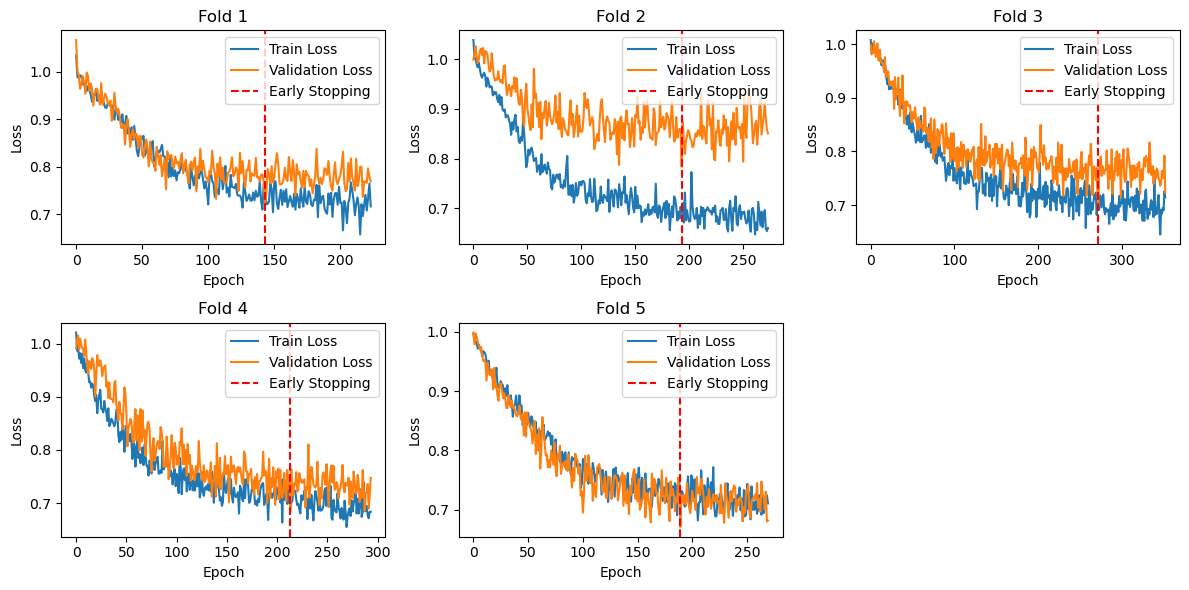

In [9]:
# print all losses for each fold on different subplots
plt.figure(figsize=(12, 6))
for i in range(N_FOLDS):
    plt.subplot(2, 3, i + 1)
    plt.plot(all_train_losses[i], label='Train Loss')
    plt.plot(all_val_losses[i], label='Validation Loss')
    plt.axvline(all_last_indexes[i], color='r', linestyle='--', label='Early Stopping')
    plt.title(f'Fold {i + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


## Testing

In [10]:
tennis_test_dataset = TennisMatchDataset([
                                            'past-mallorca-atp-singles',
                                            'past-eastbourne-atp-singles',
                                            'past-wimbledon-atp-singles',
                                          ])
nb_errors = 0
list_vectors_test = []
list_labels_test = []
list_matches_ids_test = []

list_vectors_test, list_labels_test, list_matches_ids_test, nb_errors = tennis_test_dataset.get_past_vectors()


print(f'Number of errors : {nb_errors} over {len(tennis_test_dataset.get_matches_ids())} matches')

print(f'Number of vectors : {len(list_vectors_test)}')
input_shapes = []
for i in range(len(list_vectors_test[0])):
    input_shapes.append(len(list_vectors_test[0][i]))
print(f'Input shapes : {input_shapes}')

# remove vectors where there is too much missing values ie too much c.PADDING values in all the vectors
new_list_vectors_test = []
new_list_labels_test = []
new_list_matches_ids_test = []

for i in tqdm(range(len(list_vectors_test))) :
    vector = list_vectors_test[i]
    num_padding = 0
    for spe_vec in vector :
        num_padding += spe_vec.count(c.PADDING)
    if num_padding < MAX_PADDED and list_labels_test[i] != c.PADDING:
        new_list_vectors_test.append(vector)
        new_list_labels_test.append(list_labels_test[i])
        new_list_matches_ids_test.append(list_matches_ids_test[i])
print(f'Number of vectors after removing vectors with too much missing values : {len(new_list_vectors_test)}')

if len(new_list_vectors_test) == 0:
    print('No data to predict')
    sys.exit(0)

tournament_features_vector_test = []
player1_features_vector_test = []
player2_features_vector_test = []
h2h_overall_vector_test = []
h2h_surface_vector_test = []
shape_overall_player1_vector_test = []
shape_overall_player2_vector_test = []

for vector in new_list_vectors_test:
    tournament_features_vector_test.append(vector[0])
    player1_features_vector_test.append(vector[1])
    player2_features_vector_test.append(vector[2])
    h2h_overall_vector_test.append(vector[3])
    h2h_surface_vector_test.append(vector[4])
    shape_overall_player1_vector_test.append(vector[5])
    shape_overall_player2_vector_test.append(vector[6])

# convert to pytorch tensor
tournament_features_tensor_test = torch.tensor(tournament_features_vector_test, dtype=torch.float)
tournament_features_mask_test = torch.zeros_like(tournament_features_tensor_test)
tournament_features_mask_test[tournament_features_tensor_test != c.PADDING] = 1.
player1_features_tensor_test = torch.tensor(player1_features_vector_test, dtype=torch.float)
player1_features_mask_test = torch.zeros_like(player1_features_tensor_test)
player1_features_mask_test[player1_features_tensor_test != c.PADDING] = 1.
player2_features_tensor_test = torch.tensor(player2_features_vector_test, dtype=torch.float)
player2_features_mask_test = torch.zeros_like(player2_features_tensor_test)
player2_features_mask_test[player2_features_tensor_test != c.PADDING] = 1.
h2h_overall_tensor_test = torch.tensor(h2h_overall_vector_test, dtype=torch.float)
h2h_overall_mask_test = torch.zeros_like(h2h_overall_tensor_test)
h2h_overall_mask_test[h2h_overall_tensor_test != c.PADDING] = 1.
h2h_surface_tensor_test = torch.tensor(h2h_surface_vector_test, dtype=torch.float)
h2h_surface_mask_test = torch.zeros_like(h2h_surface_tensor_test)
h2h_surface_mask_test[h2h_surface_tensor_test != c.PADDING] = 1.
shape_overall_player1_tensor_test = torch.tensor(shape_overall_player1_vector_test, dtype=torch.float)
shape_overall_player1_mask_test = torch.zeros_like(shape_overall_player1_tensor_test)
shape_overall_player1_mask_test[shape_overall_player1_tensor_test != c.PADDING] = 1.
shape_overall_player2_tensor_test = torch.tensor(shape_overall_player2_vector_test, dtype=torch.float)
shape_overall_player2_mask_test = torch.zeros_like(shape_overall_player2_tensor_test)
shape_overall_player2_mask_test[shape_overall_player2_tensor_test != c.PADDING] = 1.

label_vector = []
for label in new_list_labels_test:
    label_vector.append(label)

label_tensor_test = torch.tensor(label_vector)

test_dataset = TensorDataset(tournament_features_tensor_test, 
                             tournament_features_mask_test, 
                             player1_features_tensor_test, 
                             player1_features_mask_test, 
                             player2_features_tensor_test, 
                             player2_features_mask_test,
                             h2h_overall_tensor_test, 
                             h2h_overall_mask_test, 
                             h2h_surface_tensor_test, 
                             h2h_surface_mask_test, 
                             shape_overall_player1_tensor_test, 
                             shape_overall_player1_mask_test, 
                             shape_overall_player2_tensor_test, 
                             shape_overall_player2_mask_test, 
                             label_tensor_test)

test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

all_predictions = []
for j in range(N_FOLDS):
    model = TennisMatchPredictor(input_shapes)
    model.load_state_dict(torch.load(f'{c2.REPO_PATH}/tennis/models/best_model_fold_{j + 1}.pth'))
    model.eval()
    predictions = []
    with torch.no_grad():
        test_loss = 0.0
        for i, data in enumerate(test_dataloader):
            tournament_features, tournament_mask, player1_features, player1_mask, player2_features, player2_mask, h2h_overall, h2h_overall_mask, h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, shape_overall_player2, shape_overall_player2_mask, labels = data
            outputs = model(tournament_features = tournament_features, 
                            player1_features = player1_features, 
                            player2_features = player2_features, 
                            h2h_overall = h2h_overall, 
                            h2h_surface = h2h_surface, 
                            shape_overall_player1 = shape_overall_player1, 
                            shape_overall_player2 = shape_overall_player2,
                            tournament_mask = tournament_mask, 
                            player1_mask = player1_mask, 
                            player2_mask = player2_mask, 
                            h2h_overall_mask = h2h_overall_mask,
                            h2h_surface_mask = h2h_surface_mask,
                            shape_overall_player1_mask = shape_overall_player1_mask,
                            shape_overall_player2_mask = shape_overall_player2_mask
                            )    
            predictions.append(outputs)        
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
        print(f'Test Loss: for {j+1} : {test_loss/len(test_dataloader):.2f}')
    # find the matches where the model is the most confident and was right
    predictions = torch.cat(predictions).flatten()
    all_predictions.append(predictions)

all_predictions = torch.stack(all_predictions)
predictions = all_predictions.mean(dim=0)

# get the indexes of the matches where the model was right
# create data frame with the predictions and the labels and the match ids
df = pd.DataFrame(columns=['match_id', 'predictions', 'labels'])
df['predictions'] = predictions
df['labels'] = label_tensor_test
df['match_id'] = new_list_matches_ids_test
# order the data frame by predictions values
df = df.sort_values(by='predictions', ascending=False)

# fetch the odds of betclic for the matches
odds_1_list = []
odds_2_list = []
prob_list = []
for match_id in df['match_id']:
    match_odds =tennis_test_dataset.get_match(match_id).get_odds()
    odds_found = False
    for match_odd in match_odds:
        if match_odd['bookmaker'] == 'Betclic.fr':
            odds_found = True
            odds_1_list.append(float(match_odd['odds'][0]))
            odds_2_list.append(float(match_odd['odds'][1]))
            player1odd = float(match_odd['odds'][0])
            player2odd = float(match_odd['odds'][1])
            prob_win_player1 = 1/player1odd
            prob_win_player2 = 1/player2odd
            # normalize the probabilities
            prob_sum = prob_win_player1 + prob_win_player2
            prob_win_player1 = prob_win_player1/prob_sum
            prob_win_player2 = prob_win_player2/prob_sum
            prob_list.append(2*prob_win_player1-1)
            break
    if not odds_found:
        odds_1_list.append(None)
        odds_2_list.append(None)
        prob_list.append(None) 

df['odds_1'] = odds_1_list
df['odds_2'] = odds_2_list
df['bookmaker_pred'] = prob_list
df = df.loc[df['odds_1'].notnull()]

Loading data for tournaments {'past-wimbledon-atp-singles', 'past-mallorca-atp-singles', 'past-eastbourne-atp-singles'} ...
... loaded 195 matches
Updating id table ...
... id table updated


100%|██████████| 3/3 [00:00<00:00, 54.09it/s]

Error 'f0by' for match dIGYcqpR in tournament past-wimbledon-atp-singles
Error 'n552' for match jJOpDFFl in tournament past-wimbledon-atp-singles
Error 's0tx' for match Y3su6b8L in tournament past-wimbledon-atp-singles
Error 'kf17' for match dGsH7W0N in tournament past-wimbledon-atp-singles
Error 'f0by' for match 0AiWwesJ in tournament past-wimbledon-atp-singles
Error 'j0a4' for match dIfFswrf in tournament past-wimbledon-atp-singles
Error 'j0a4' for match U7E4goaE in tournament past-mallorca-atp-singles
Error 'cd85' for match AobhQfMi in tournament past-mallorca-atp-singles
Error 'j0a4' for match 6H1Yv32e in tournament past-mallorca-atp-singles
Error 'mn20' for match Wz3AkBk3 in tournament past-mallorca-atp-singles
Error 'cg07' for match pWxHNmhe in tournament past-mallorca-atp-singles
Error 'j476' for match dlggVvf4 in tournament past-mallorca-atp-singles
Error 'n0dd' for match dCytMzHj in tournament past-mallorca-atp-singles
Error 'gg65' for match x6Z8P9Nr in tournament past-mallorc

  0%|          | 0/165 [00:00<?, ?it/s]

Number of vectors after removing vectors with too much missing values : 103
Test Loss: for 1 : 0.81
Test Loss: for 2 : 0.82
Test Loss: for 3 : 0.78
Test Loss: for 4 : 0.83
Test Loss: for 5 : 0.75


## Betting

Match : jq8ynwHk Sinner J. - Hanfmann Y., no bet on player 1 (model pred =0.97)
Match : jq8ynwHk Sinner J. - Hanfmann Y., no bet on player 2 (model pred =0.00)
Match : 2ui8V8Ja Sinner J. - Kecmanovic M., no bet on player 1 (model pred =0.96)
Match : 2ui8V8Ja Sinner J. - Kecmanovic M., no bet on player 2 (model pred =0.00)
Match : 0tUC6sO6 Sinner J. - Shelton B., no bet on player 1 (model pred =0.93)
Match : 0tUC6sO6 Sinner J. - Shelton B., no bet on player 2 (model pred =0.01)
Match : ObL2Ki4t Alcaraz C. - Vukic A., no bet on player 1 (model pred =0.89)
Match : ObL2Ki4t Alcaraz C. - Vukic A., no bet on player 2 (model pred =0.02)
Match : 48ZmFUDj Bautista-Agut R. - Daniel T., bet on player 1 (model pred = 0.89), amount to bet : 5.98, odds : 1.36, label : 1.00, total amount : 102.15
Match : 48ZmFUDj Bautista-Agut R. - Daniel T., no bet on player 2 (model pred =0.02)
Match : CYSBxIl3 Alcaraz C. - Tiafoe F., no bet on player 1 (model pred =0.87)
Match : CYSBxIl3 Alcaraz C. - Tiafoe F., no

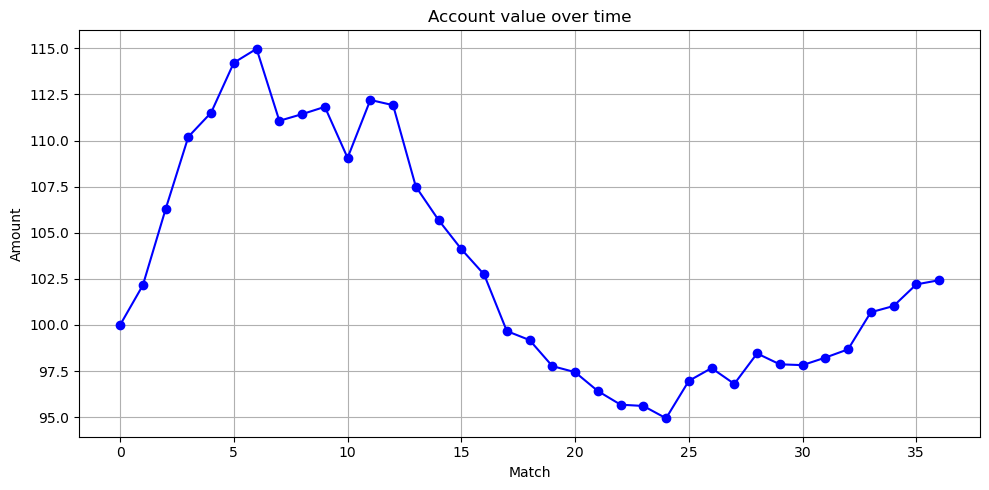

In [11]:
# Strategy results : bet the proportion given by the kelly criterion on each match
INIT_AMOUNT = 100 # euros
GREEN = '\033[92m'
RED = '\033[91m'
RESET = '\033[0m'
# bet on player 1


# Kelly criterion
def kelly_criterion(odds, prob, safe=0.1):
    return (prob - ((1- prob)/(odds-1)))*safe

test = df.copy()
test['prob_player1'] = ((1+test['predictions'])/2)**1.5
test['prob_player2'] = ((1-test['predictions'])/2)**1.5
# apply keely criterion
test['kelly_criterion_player1'] = test.apply(lambda row : kelly_criterion(row['odds_1'], row['prob_player1']), axis=1)
test['kelly_criterion_player2'] = test.apply(lambda row : kelly_criterion(row['odds_2'], row['prob_player2']), axis=1)

account_values = []

amount = INIT_AMOUNT
account_values.append(amount)
# try the model 
for i, row in test.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    if row['kelly_criterion_player1'] > 0.0 :
        # betting on player 1
        bet = amount * row['kelly_criterion_player1']
        # win or lose
        if row['labels'] == 1:
            amount += bet * (row['odds_1']-1)
            print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 1 (model pred = {row['prob_player1']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        else:
            amount -= bet
            print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 1 (model pred ={row['prob_player1']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        account_values.append(amount)
    else : 
        print(f"Match : {row['match_id']} {player1} - {player2}, no bet on player 1 (model pred ={row['prob_player1']:.2f})")
    if row['kelly_criterion_player2'] > 0.0 :
        # betting on player 2
        bet = amount * row['kelly_criterion_player2']
        # win or lose
        if row['labels'] == -1:
            amount += bet * (row['odds_2']-1)
            print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 2 (model pred ={row['prob_player2']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        else:
            amount -= bet
            print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 2 (model pred ={row['prob_player2']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        account_values.append(amount)
    else :
        print(f"Match : {row['match_id']} {player1} - {player2}, no bet on player 2 (model pred ={row['prob_player2']:.2f})")
print(f"\nTotal amount after betting : {amount:.2f}")
if amount > INIT_AMOUNT:
    print(f"{GREEN}Relative won {(amount-INIT_AMOUNT)/INIT_AMOUNT*100:.2f}%{RESET}")
else:
    print(f"{RED}Relative lost {(INIT_AMOUNT-amount)/INIT_AMOUNT*100:.2f}%{RESET}")

plt.figure(figsize=(10, 5))
plt.plot(account_values, label='Account value', color='blue', marker='o')
plt.xlabel('Match')
plt.ylabel('Amount')
plt.title('Account value over time')
plt.grid()
plt.tight_layout()
plt.show()
# print the results of the strategy


## Autre

### Kelly + threshold

In [12]:
CONFIDENCE_THRESHLOLD = 0.7

# Kelly criterion
def kelly_criterion(odds, prob, safe=0.1):
    return (prob - ((1- prob)/(odds)))*safe

bet_on_player_1_df = df.loc[df['predictions'] > CONFIDENCE_THRESHLOLD].copy()
bet_on_player_1_df['prediction_prob']= bet_on_player_1_df['predictions'].apply(lambda x : (1+x)/2)
bet_on_player_1_df['kelly_criterion'] = bet_on_player_1_df.apply(lambda row : kelly_criterion(row['odds_1'], row['prediction_prob']), axis=1)
bet_on_player_2_df = df.loc[df['predictions'] < -CONFIDENCE_THRESHLOLD].copy()
bet_on_player_2_df['prediction_prob']= bet_on_player_2_df['predictions'].apply(lambda x : (1-x)/2)
bet_on_player_2_df['kelly_criterion'] = bet_on_player_2_df.apply(lambda row : kelly_criterion(row['odds_2'], row['prediction_prob']), axis=1)
bet_on_player_2_df = bet_on_player_2_df.sort_values(by='predictions', ascending=True)

total_amount = INIT_AMOUNT
for i, row in bet_on_player_1_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = row['kelly_criterion']*total_amount
    if row['labels'] == 1:
        total_amount += amout_to_bet*(row['odds_1']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 1 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")
    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 1 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")

    

# bet on player 2
for i, row in bet_on_player_2_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = row['kelly_criterion']*total_amount
    if row['labels'] == -1:
        total_amount += amout_to_bet*(row['odds_2']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 2 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")

    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 2 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")



print(f"\nTotal amount after betting : {total_amount:.2f}")
if total_amount >= INIT_AMOUNT:
    print(f"{GREEN}Relative won {(total_amount-INIT_AMOUNT)/INIT_AMOUNT*100:.2f}%{RESET}")
else:
    print(f"{RED}Relative lost {(INIT_AMOUNT-total_amount)/INIT_AMOUNT*100:.2f}%{RESET}")

Match : jq8ynwHk Sinner J. - Hanfmann Y., bet on player 1 (0.98), amount to bet : 9.58, odds : 1.01, label : 1.00, total amount : 100.10
Match : 2ui8V8Ja Sinner J. - Kecmanovic M., bet on player 1 (0.98), amount to bet : 9.53, odds : 1.01, label : 1.00, total amount : 100.19
Match : 0tUC6sO6 Sinner J. - Shelton B., bet on player 1 (0.95), amount to bet : 9.05, odds : 1.04, label : 1.00, total amount : 100.55
Match : ObL2Ki4t Alcaraz C. - Vukic A., bet on player 1 (0.93), amount to bet : 8.63, odds : 1.01, label : 1.00, total amount : 100.64
Match : 48ZmFUDj Bautista-Agut R. - Daniel T., bet on player 1 (0.93), amount to bet : 8.80, odds : 1.36, label : 1.00, total amount : 103.81
Match : CYSBxIl3 Alcaraz C. - Tiafoe F., bet on player 1 (0.91), amount to bet : 8.63, odds : 1.06, label : 1.00, total amount : 104.33
Match : Y1tyOWT6 Draper J. - Ymer E., bet on player 1 (0.91), amount to bet : 8.57, odds : 1.03, label : 1.00, total amount : 104.58
Match : CUx6jYQO Fritz T. - O'Connell C., 

### Threshold method

Match : jq8ynwHk Sinner J. - Hanfmann Y., bet on player 1 (0.98), amount to bet : 9.58, odds : 1.01, label : 1.00, total amount : 100.10
Match : 2ui8V8Ja Sinner J. - Kecmanovic M., bet on player 1 (0.98), amount to bet : 9.53, odds : 1.01, label : 1.00, total amount : 100.19
Match : 0tUC6sO6 Sinner J. - Shelton B., bet on player 1 (0.95), amount to bet : 9.05, odds : 1.04, label : 1.00, total amount : 100.55
Match : ObL2Ki4t Alcaraz C. - Vukic A., bet on player 1 (0.93), amount to bet : 8.63, odds : 1.01, label : 1.00, total amount : 100.64
Match : 48ZmFUDj Bautista-Agut R. - Daniel T., bet on player 1 (0.93), amount to bet : 8.80, odds : 1.36, label : 1.00, total amount : 103.81
Match : CYSBxIl3 Alcaraz C. - Tiafoe F., bet on player 1 (0.91), amount to bet : 8.63, odds : 1.06, label : 1.00, total amount : 104.33
Match : Y1tyOWT6 Draper J. - Ymer E., bet on player 1 (0.91), amount to bet : 8.57, odds : 1.03, label : 1.00, total amount : 104.58
Match : CUx6jYQO Fritz T. - O'Connell C., 

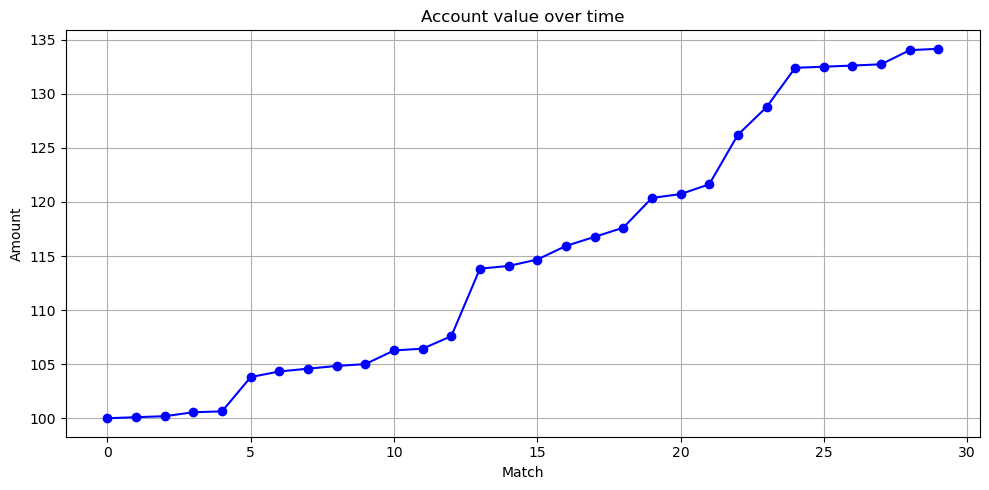

In [17]:
PROB_THRESHOLD = 0.7

def kelly_criterion(odds, prob, safe=0.1):
    return (prob - ((1- prob)/(odds)))*safe

# if predictions > 0.6 bet on player 1, if predictions < -0.6 bet on player 2
bet_on_player_1_df = df.loc[df['predictions'] > PROB_THRESHOLD].copy()
bet_on_player_1_df['prediction_prob']= bet_on_player_1_df['predictions'].apply(lambda x : (1+x)/2)
bet_on_player_1_df['kelly_criterion'] = bet_on_player_1_df.apply(lambda row : kelly_criterion(row['odds_1'], row['prediction_prob']), axis=1)

bet_on_player_2_df = df.loc[df['predictions'] < -PROB_THRESHOLD].copy()
bet_on_player_2_df['prediction_prob']= bet_on_player_2_df['predictions'].apply(lambda x : (1-x)/2)
bet_on_player_2_df['kelly_criterion'] = bet_on_player_2_df.apply(lambda row : kelly_criterion(row['odds_2'], row['prediction_prob']), axis=1)
account_values = []
total_amount = INIT_AMOUNT
account_values.append(total_amount)
for i, row in bet_on_player_1_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = max(row['kelly_criterion']*total_amount, 0)
    if row['labels'] == 1:
        total_amount += amout_to_bet*(row['odds_1']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 1 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")
    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 1 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")
    account_values.append(total_amount)

for i, row in bet_on_player_2_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = max(row['kelly_criterion']*total_amount, 0)
    if row['labels'] == -1:
        total_amount += amout_to_bet*(row['odds_2']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 2 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")
    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 2 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")
    account_values.append(total_amount)
print(f"\nTotal amount after betting : {total_amount:.2f}")
if total_amount >= INIT_AMOUNT:
    print(f"{GREEN}Relative won {(total_amount-INIT_AMOUNT)/INIT_AMOUNT*100:.2f}%{RESET}")
else:
    print(f"{RED}Relative lost {(INIT_AMOUNT-total_amount)/INIT_AMOUNT*100:.2f}%{RESET}")

plt.figure(figsize=(10, 5))
plt.plot(account_values, label='Account value', color='blue', marker='o')
plt.xlabel('Match')
plt.ylabel('Amount')
plt.title('Account value over time')
plt.grid()
plt.tight_layout()
plt.show()